In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,246070,0,0,76561198142010577,245,33,1,5.1,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...
1,246070,1,0,76561197977661213,305,3,-1,0.5,"September 3, 2022","Years late review, but yeah this is half finis..."
2,246070,0,0,0xAF,524,6,1,8.0,"April 9, 2022","You need to have some programming, debugging a..."
3,246070,1,1,Duck_Hunt_Pro,784,62,-1,1.8,"March 18, 2022","What the hell happened here, Double Fine? Not ..."
4,246070,0,0,Caliburn_Davai,221,2,1,23.6,"March 7, 2022",Loved playing this game! The mix of puzzles an...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,5.1,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...
1,1,0,-1,0.5,"September 3, 2022","Years late review, but yeah this is half finis..."
2,0,0,1,8.0,"April 9, 2022","You need to have some programming, debugging a..."
3,1,1,-1,1.8,"March 18, 2022","What the hell happened here, Double Fine? Not ..."
4,0,0,1,23.6,"March 7, 2022",Loved playing this game! The mix of puzzles an...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1
5,"February 3, 2022",I liked it - but it was never finished.,2,0,5.0,-1
6,"January 19, 2022",This game is great for good enough programmers...,0,0,16.4,1
7,"December 18, 2020","This game is, yes, finished. There is at least...",1,0,6.5,1
8,"November 6, 2020",clever game which is extremely fun for program...,0,0,25.2,1
9,"October 11, 2020","Game is really fun, but you can progress throu...",1,1,9.4,-1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  100 non-null    object 
 1   Review_Text     99 non-null     object 
 2   Num_Helpful     100 non-null    int64  
 3   Num_Funny       100 non-null    int64  
 4   Hours_Played    100 non-null    float64
 5   Recommend       100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19340/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1,1662249600
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1,1662163200
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1,1649462400
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1,1647561600
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1,1646611200


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19340/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1,1662249600,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1,1662163200,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1,1649462400,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1,1647561600,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1,1646611200,2722


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1,1662249600,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1,1662163200,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1,1649462400,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1,1647561600,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1,1646611200,2722


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2748,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...
1,2748,"September 3, 2022","Years late review, but yeah this is half finis..."
2,2727,"April 9, 2022","You need to have some programming, debugging a..."
3,2724,"March 18, 2022","What the hell happened here, Double Fine? Not ..."
4,2722,"March 7, 2022",Loved playing this game! The mix of puzzles an...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2559,"January 21, 2019",4
1,2565,"March 4, 2019",4
2,2571,"April 14, 2019",4
3,2577,"May 27, 2019",4
4,2582,"July 1, 2019",4
5,2582,"June 29, 2019",8
6,2583,"July 10, 2019",4
7,2587,"August 5, 2019",4
8,2588,"August 8, 2019",4
9,2591,"August 29, 2019",4


<AxesSubplot:>

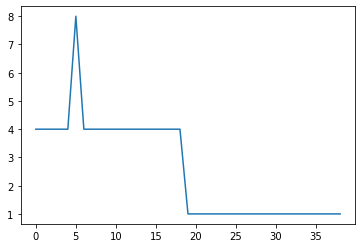

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

100

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

2.5641025641025643

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2559,4
1,2565,4
2,2571,4
3,2577,4
4,2582,12
5,2583,4
6,2587,4
7,2588,4
8,2591,4
9,2593,4


<AxesSubplot:>

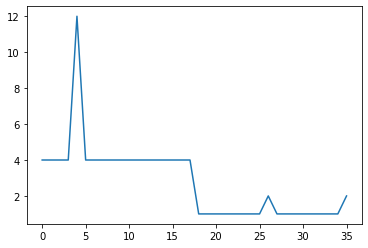

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

100

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

2.7777777777777777

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1,1662249600,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1,1662163200,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1,1649462400,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1,1647561600,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1,1646611200,2722


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2559,0
1,2565,0
2,2571,0
3,2577,8
4,2582,0
5,2583,4
6,2587,0
7,2588,0
8,2591,0
9,2593,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2559,0,0,0.0,0.0
2565,0,0,0.0,0.0
2571,0,0,0.0,0.0
2577,2,2,2.0,2.0
2582,0,0,0.0,0.0
2583,1,1,1.0,1.0
2587,0,0,0.0,0.0
2588,0,0,0.0,0.0
2591,0,0,0.0,0.0


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

96

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

0.96

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2559,0
1,2565,0
2,2571,0
3,2577,4
4,2582,0
5,2583,0
6,2587,0
7,2588,0
8,2591,0
9,2593,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2559,0,0,0.0,0.0
2565,0,0,0.0,0.0
2571,0,0,0.0,0.0
2577,1,1,1.0,1.0
2582,0,0,0.0,0.0
2583,0,0,0.0,0.0
2587,0,0,0.0,0.0
2588,0,0,0.0,0.0
2591,0,0,0.0,0.0


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

13

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.13

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2559,379.2
1,2565,32.4
2,2571,16.0
3,2577,2.8
4,2582,59.6
5,2583,111.2
6,2587,10.0
7,2588,4.0
8,2591,22.8
9,2593,13.6


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2559,94.8,94.8,94.80,94.800000
2565,8.1,8.1,8.10,8.100000
2571,4.0,4.0,4.00,4.000000
2577,0.7,0.7,0.70,0.700000
2582,10.1,0.6,4.20,4.966667
2583,27.8,27.8,27.80,27.800000
2587,2.5,2.5,2.50,2.500000
2588,1.0,1.0,1.00,1.000000
2591,5.7,5.7,5.70,5.700000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

1249.6999999999998

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

12.497

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2559,1.0
1,2565,1.0
2,2571,1.0
3,2577,-1.0
4,2582,1.0
5,2583,1.0
6,2587,-1.0
7,2588,1.0
8,2591,1.0
9,2593,1.0


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2559,1,1,1.0,1.0
2565,1,1,1.0,1.0
2571,1,1,1.0,1.0
2577,-1,-1,-1.0,-1.0
2582,1,1,1.0,1.0
2583,1,1,1.0,1.0
2587,-1,-1,-1.0,-1.0
2588,1,1,1.0,1.0
2591,1,1,1.0,1.0


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

32

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.32

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,5.1,1,1662249600,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.5,-1,1662163200,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,8.0,1,1649462400,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,1.8,-1,1647561600,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,23.6,1,1646611200,2722


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Num_Funny'] = (df_min_max_scaled['Num_Funny'] - df_min_max_scaled['Num_Funny'].min()) / (df_min_max_scaled['Num_Funny'].max() - df_min_max_scaled['Num_Funny'].min())
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,0.048780,1.0,1.000000,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.000000,0.0,0.999244,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,0.079533,1.0,0.888048,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,0.013786,0.0,0.871407,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,0.244963,1.0,0.863086,2722
...,...,...,...,...,...,...,...,...
95,"June 29, 2019","An interesting Game, that allows modifying the...",0,0,0.039236,1.0,0.120272,2582
96,"May 27, 2019","Terrible ""game"". The concept sounds fun on pap...",2,1,0.002121,0.0,0.095310,2577
97,"April 14, 2019",fun,0,0,0.037116,1.0,0.062784,2571
98,"March 4, 2019",Lots of rough spots but overall quite fun if y...,0,0,0.080594,1.0,0.031770,2565


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19340/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 4, 2022",the game is good 7/10TLDR: not everyone cup of...,0,0,0.048780,1.0,1.000000,2748
1,"September 3, 2022","Years late review, but yeah this is half finis...",1,0,0.000000,0.0,0.999244,2748
2,"April 9, 2022","You need to have some programming, debugging a...",0,0,0.079533,1.0,0.888048,2727
3,"March 18, 2022","What the hell happened here, Double Fine? Not ...",1,1,0.013786,0.0,0.871407,2724
4,"March 7, 2022",Loved playing this game! The mix of puzzles an...,0,0,0.244963,1.0,0.863086,2722
5,"February 3, 2022",I liked it - but it was never finished.,2,0,0.047720,0.0,0.838880,2718
6,"January 19, 2022",This game is great for good enough programmers...,0,0,0.168611,1.0,0.827534,2715
7,"December 18, 2020","This game is, yes, finished. There is at least...",1,0,0.063627,1.0,0.527231,2659
8,"November 6, 2020",clever game which is extremely fun for program...,0,0,0.261930,1.0,0.495461,2653
9,"October 11, 2020","Game is really fun, but you can progress throu...",1,1,0.094380,0.0,0.475794,2649


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2559         [It's good, It's good, It's good, It's good]
2565    [Lots of rough spots but overall quite fun if ...
2571                                 [fun, fun, fun, fun]
2577    [Terrible "game". The concept sounds fun on pa...
2582    [Super cute graphics! Havent figured out all t...
2583    [I LOVE THIS GAME! (possible minor spoilers in...
2587    [I hate to say it, I can't recommend this game...
2588    [it's a "meh" from me, it's a "meh" from me, i...
2591    [Well, it is maybe I somewhat grasp the idea o...
2593    [I can name my character Havve Hogan, game of ...
2601    [Game braking bug in act 4 and not an enjoyabl...
2603    [Hacking doesn't really happen at source code ...
2604    [Great game, although it can be really frustra...
2605    [Such a good game! It has a few bugs but it's ...
2607    [Fresh new idea to how games can be made and p...
2608    [Intersting idea, flawed execution.At its core...
2610    [Overall it's a very fun and a story that kept..

In [52]:
# storing data in JSON format
df_text_list.to_json('hacknslash_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
hacknslash_text = pd.read_json('hacknslash_text.json')
print(hacknslash_text)

           name  index                                               data
0   Review_Text   2559       [It's good, It's good, It's good, It's good]
1   Review_Text   2565  [Lots of rough spots but overall quite fun if ...
2   Review_Text   2571                               [fun, fun, fun, fun]
3   Review_Text   2577  [Terrible "game". The concept sounds fun on pa...
4   Review_Text   2582  [Super cute graphics! Havent figured out all t...
5   Review_Text   2583  [I LOVE THIS GAME! (possible minor spoilers in...
6   Review_Text   2587  [I hate to say it, I can't recommend this game...
7   Review_Text   2588  [it's a "meh" from me, it's a "meh" from me, i...
8   Review_Text   2591  [Well, it is maybe I somewhat grasp the idea o...
9   Review_Text   2593  [I can name my character Havve Hogan, game of ...
10  Review_Text   2601  [Game braking bug in act 4 and not an enjoyabl...
11  Review_Text   2603  [Hacking doesn't really happen at source code ...
12  Review_Text   2604  [Great game, a

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('hacknslash_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19340/2735733552.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
hacknslash_mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
hacknslash_mean_day.to_csv('hacknslash_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_19340/1211592555.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hacknslash_mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
hacknslash_review = df_sorted.to_csv('hacknslash_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])